# MNIST Digit Classification
This project involves building a basic dense neural network model to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels.

## 1. Import Libraries
import the necessary libraries for data manipulation, visualization, and building the neural network.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

: 

## 2. Load and Explore the Dataset
Load the MNIST dataset and explore its structure, including the shape of the data and some sample images.

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_train.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (60000,)


- The dataset contains 60,000 training images and 10,000 test images.

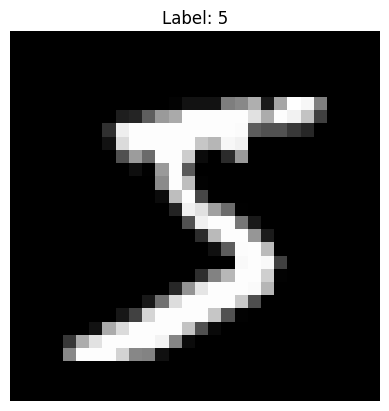

In [28]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

- we have digit images and their corresponding labels.

## 3. Data Preprocessing

Reshape the Data
- flatten the 28x28 images into 784-dimensional vectors.

In [29]:
# reshaping the data
X_train= X_train.reshape(X_train.shape[0], -1)
X_test= X_test.reshape(X_test.shape[0], -1)

Normalize the Data
- normalize pixel values to the range [0, 1] by dividing by 255.

In [30]:
# normalizing the data
X_train=X_train/255
X_test=X_test/255

One-Hot Encode the Labels
- convert the integer labels(0-9) into one-hot encoded values.

In [31]:
# one-hot encoding the y labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

----------------------------------------------------------------------------
## 4. Build the Neural Network Model

In [33]:
# now defining the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    Dense(10, activation='softmax')
])


- The model has two hidden layers with ReLU activation and L2 regularization, and an output layer with softmax for classification.
----------------------------------------------------------------------------

## 5. Compile the Model

In [34]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- In this step, we compile the model using the Adam optimizer, categorical cross-entropy loss function, and accuracy as a metric.
----------------------------------------------------------------

## 6. Train the Model

In [35]:
# here we will fit the data into model and do actuall training
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=7,
    validation_split=0.1
)

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9224 - loss: 0.3751 - val_accuracy: 0.9678 - val_loss: 0.2160
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9614 - loss: 0.2275 - val_accuracy: 0.9732 - val_loss: 0.1893
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.1956 - val_accuracy: 0.9710 - val_loss: 0.1800
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.1776 - val_accuracy: 0.9757 - val_loss: 0.1729
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9745 - loss: 0.1656 - val_accuracy: 0.9780 - val_loss: 0.1584
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.1577 - val_accuracy: 0.9755 - val_loss: 0.1592
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.1498 - val_accuracy: 0.9778 - val_loss: 0.1539


- The model is trained for 11 epochs with a batch size of 32, using 10% of the training data for validation.
----------------------------------------------------------------

## 7. Visualize Training and validation Accuracy

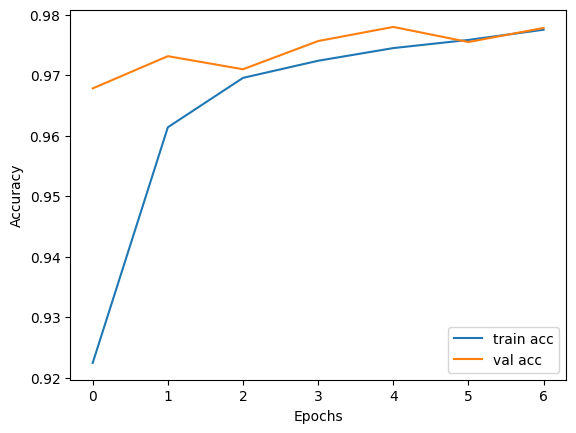

In [36]:
# checking traing curve
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The steps from 4 to 7 are repeated with different changes like
- changing the number of epochs,
- adding dropout layers,
- changing architecture,
- adding regularization, etc.
and I choose the best one based on validation accuracy and loss.

---------------------------------------------------------------------------
## 8. Evaluate the Model on Test Data

In [37]:
# evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.1572
Test Loss: 0.15718528628349304, Test Accuracy: 0.9746999740600586


----------------------------------------------------------------------------
## 9. Visualize First 25 Test Images with Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


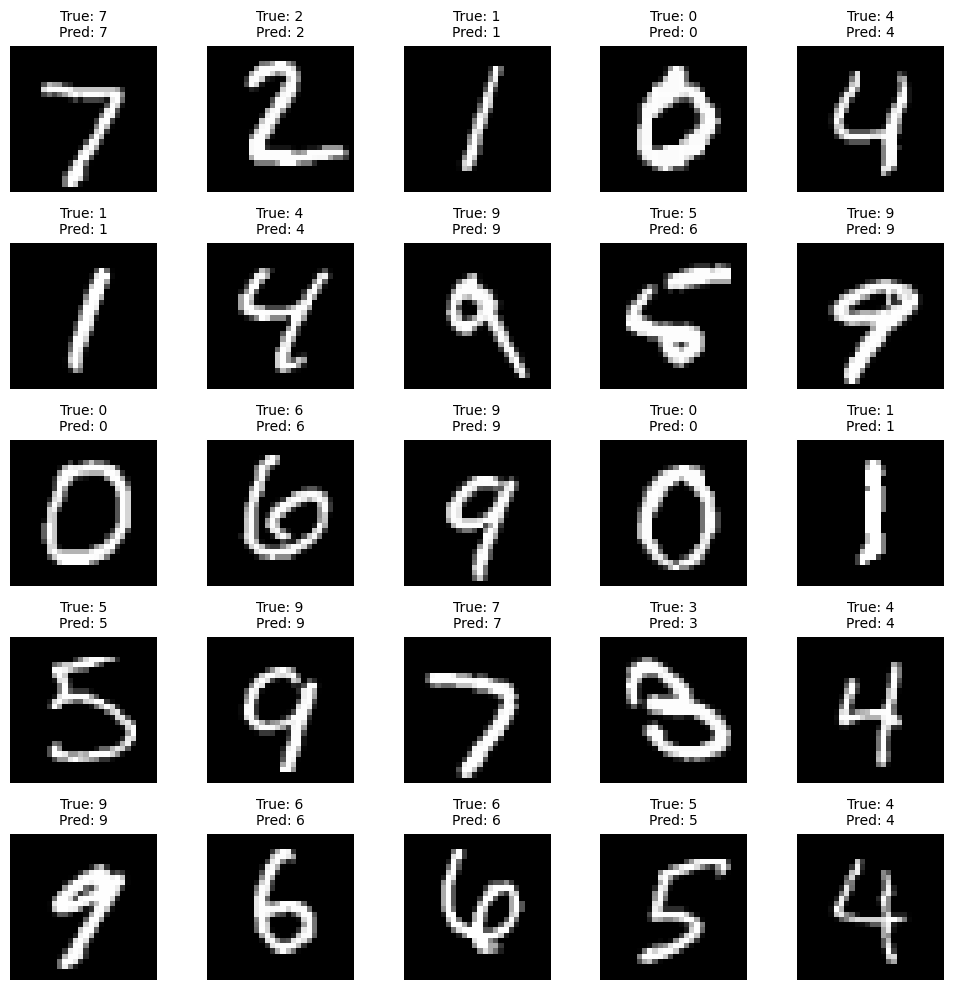

In [38]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

--------------------------
## 10. Visualize Misclassified Samples

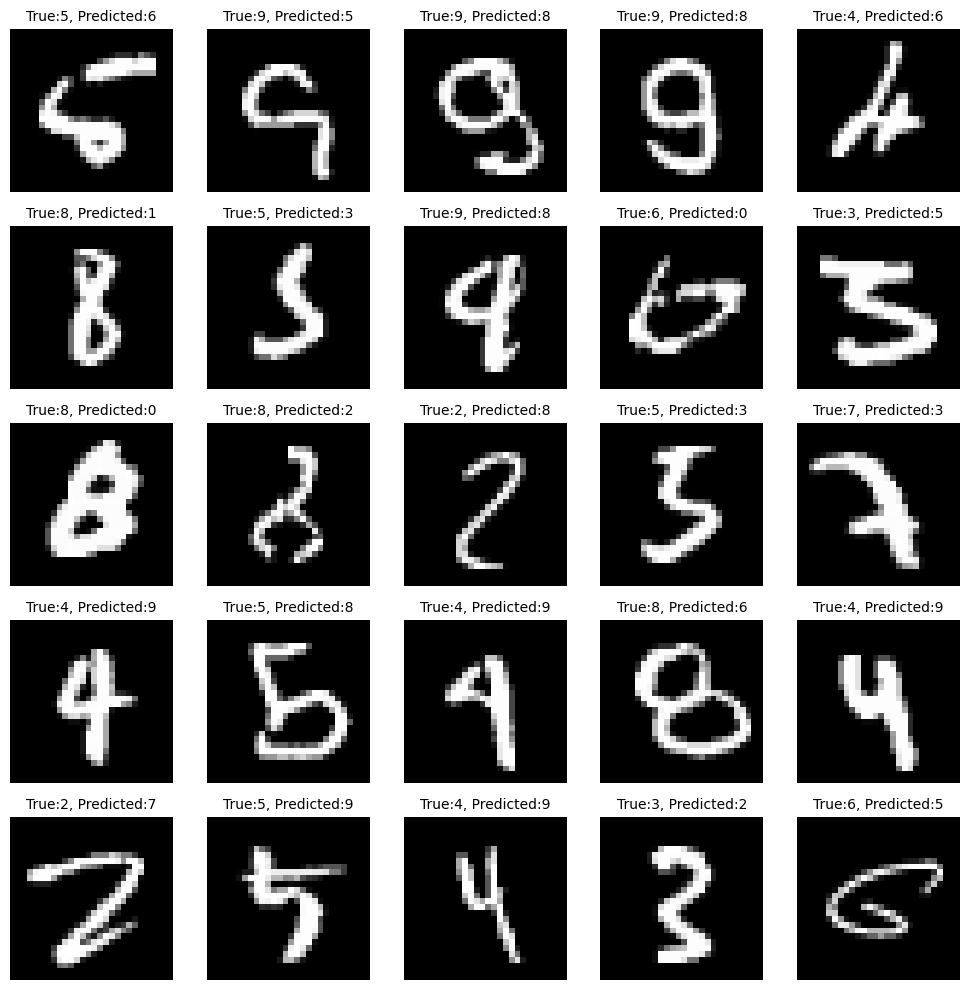

In [39]:
# misclassified samples

misclassified = np.where(y_pred != y_true)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified[:25]):
    plt.subplot(5 , 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True:{y_true[idx]}, Predicted:{y_pred[idx]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

---------------------------------------------------------------------------
## 11. Save the Model

In [42]:
model.save('mnist.keras')
print("Your model has been saved ")

Your model has been saved 
